### Data Explanation

Bank Prime Loan Rate Changes: Historical Dates of Changes and Rates (PRIME) - Daily, 1955-Jul 2023

Real Exports of Goods and Services (A020RL1Q158SBEA) - Quarterly, 1947-Jul 2023

Trimmed Mean PCE Inflation Rate (PCETRIM12M159SFRBDAL) -  Monthly, 1978-Oct 2023

Unemployment Rate (UNRATE) - Monthly 1948-Oct 2023

Real Gross Domestic Product (A191RL1Q225SBEA) - Quarterly 1947-Jul 2023 

Total Vehicle Sales (TOTALSA) - Monthly 1976-Oct 2023

NBER based Recession Indicators for the United States from the Period following the Peak through the Trough (USREC) - Monthly 1854-Nov 2023

Gross Domestic Product: Implicit Price Deflator (A191RI1Q225SBEA)

Velocity of M1 Money Stock (M1V) - Quarterly 1959-Jul 2023

New Privately-Owned Housing Units Started: Total Units (HOUST) - Monthly 1959-Oct 2023

Leading Indicators OECD: Leading indicators: CLI: Amplitude adjusted for OECD Total (OECDLOLITOAASTSAM) - Monthly 1961-Oct 2023 ***Use data from CSV

SPX - S&P 500 Adjusted closing price

USD - US Dollar Index for the international value of the US dollar relative to a basket of world currencies

fed_party- political party of Fed Chair (1=Republican)

potus_party - party of US President (1=Republican)

In [4]:
import pandas as pd

In [5]:
# properly read in data
df = pd.read_csv('master_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,ffr,change,decision,loan,exports,pce,ue,rgdp,cars,recess,gdpg,veloc,house,cli,spx,usd,fed_party,potus_party
1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-02,NaN,NaN,NaN,NaN,12.5,4.05,5.4,4.1,15.372,0.0,4.2,7.028,1621.0,100.53120,NaN,NaN,NaN,NaN
1989-01-03,NaN,NaN,NaN,NaN,12.5,4.05,5.4,4.1,15.372,0.0,4.2,7.028,1621.0,100.53120,NaN,92.500000,NaN,NaN
1989-01-04,NaN,NaN,NaN,NaN,12.5,4.05,5.4,4.1,15.372,0.0,4.2,7.028,1621.0,100.53120,275.309998,92.169998,NaN,NaN
1989-01-05,NaN,NaN,NaN,NaN,12.5,4.05,5.4,4.1,15.372,0.0,4.2,7.028,1621.0,100.53120,279.429993,92.980003,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,NaN,NaN,NaN,8.5,6.0,3.64,3.9,5.2,15.972,0.0,3.5,1.511,1372.0,99.47179,4550.580078,102.769997,1.0,0.0
2023-12-01,NaN,NaN,NaN,8.5,6.0,3.64,3.9,5.2,15.972,0.0,3.5,1.511,1372.0,99.47179,4567.799805,103.500000,1.0,0.0
2023-12-02,NaN,NaN,NaN,8.5,6.0,3.64,3.9,5.2,15.972,0.0,3.5,1.511,1372.0,99.47179,4594.629883,103.269997,1.0,0.0
2023-12-03,NaN,NaN,NaN,8.5,6.0,3.64,3.9,5.2,15.972,0.0,3.5,1.511,1372.0,99.47179,4594.629883,103.269997,1.0,0.0


In [60]:
# prep a df to be used for classifying
# n_days is how many days prior to the announcement you want to forecast
def forecast_n_days_prior(df, n_days = 7):
    df_temp = df.copy()
    df_temp.iloc[:,:3] = df_temp.iloc[:,:3].shift(-n_days)
    return df_temp.query('ffr == ffr')

In [61]:
# demonstration of function above
# forecasts 1 week prior to announcement
days_prior = forecast_n_days_prior(df, 7)

In [67]:

days_prior.shape

(276, 18)

In [62]:
days_prior.columns

Index(['ffr', 'change', 'decision', 'loan', 'exports', 'pce', 'ue', 'rgdp',
       'cars', 'recess', 'gdpg', 'veloc', 'house', 'cli', 'spx', 'usd',
       'fed_party', 'potus_party'],
      dtype='object')

In [83]:
df_numeric = days_prior.drop(['decision', 'recess', 'fed_party', 'potus_party'], axis=1)
print(df_numeric.shape)
scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, index=days_prior.index)

df_encoded = days_prior[['decision', 'recess', 'fed_party', 'potus_party']]
df_encoded.shape

(276, 14)


(276, 4)

In [84]:
df_categorical = df_encoded.astype(str)
df_categorical.dtypes
df_categorical.shape

(276, 4)

In [87]:
df_numeric.index

DatetimeIndex(['1989-06-30', '1989-08-16', '1989-09-27', '1989-11-08',
               '1989-12-13', '1990-02-01', '1990-03-21', '1990-05-09',
               '1990-06-28', '1990-08-15',
               ...
               '2022-09-14', '2022-10-26', '2022-12-07', '2023-01-25',
               '2023-03-15', '2023-04-26', '2023-06-07', '2023-07-19',
               '2023-09-13', '2023-10-25'],
              dtype='datetime64[ns]', length=276, freq=None)

In [88]:
days_prior_mixed = pd.concat([df_numeric, df_categorical], axis=1)
print(days_prior_mixed.dtypes)
days_prior_mixed.shape

0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
decision        object
recess          object
fed_party       object
potus_party     object
dtype: object


(276, 18)

In [90]:
days_prior_mixed.shape

(276, 18)

In [91]:
# Do PCA Analysis on the data to reduce dimension to 2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from prince import FAMD
import numpy as np

X = days_prior_mixed.drop(['decision'], axis=1)
y = days_prior_mixed['decision']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

famd = FAMD(n_components=7)
X_famd = famd.fit_transform(X)

famd.eigenvalues_summary
# explained_variance_ratio = famd.singular_values_ ** 2 / np.sum(famd.singular_values_ ** 2)
# print(explained_variance_ratio)

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.120,22.27%,22.27%
1,3.467,18.74%,41.01%
2,2.397,12.96%,53.97%
3,2.167,11.71%,65.68%
4,1.497,8.09%,73.78%
5,1.050,5.67%,79.45%
6,0.924,5.00%,84.45%


In [49]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.810,23.09%,23.09%
1,2.910,17.64%,40.73%
2,2.350,14.24%,54.97%
3,2.086,12.65%,67.61%
4,1.307,7.92%,75.53%
5,0.988,5.99%,81.52%
6,0.902,5.47%,86.99%


In [59]:
pd.set_option('display.max_rows', 20)    # Show all rows
pd.set_option('display.max_columns', None) # Show all columns

In [92]:

print(days_prior.dtypes)


ffr            float64
change         float64
decision       float64
loan           float64
exports        float64
pce            float64
ue             float64
rgdp           float64
cars           float64
recess         float64
gdpg           float64
veloc          float64
house          float64
cli            float64
spx            float64
usd            float64
fed_party      float64
potus_party    float64
dtype: object


In [60]:
print(days_prior)
# change and decision collinear with ffr?
# 
# Categorical:
# decision, recess, fed_party, potus_party

             ffr  change  decision   loan  exports   pce   ue  rgdp    cars  \
1989-06-30  9.25   -25.0      -1.0  11.00     18.7  4.13  5.3   3.1  14.384   
1989-08-16  9.00     0.0       0.0  10.50      4.1  3.95  5.2   3.0  16.547   
1989-09-27  9.00     0.0       0.0  10.50      4.1  3.80  5.3   3.0  15.660   
1989-11-08  8.50     0.0       0.0  10.50      6.2  3.92  5.4   0.8  13.370   
1989-12-13  8.25   -25.0      -1.0  10.50      6.2  3.94  5.4   0.8  13.550   
...          ...     ...       ...    ...      ...   ...  ...   ...     ...   
2023-04-26  5.15    25.0       1.0   8.00     -9.3  4.88  3.4   2.1  16.210   
2023-06-07  5.15     0.0       0.0   8.25     -9.3  4.33  3.6   2.1  16.607   
2023-07-19  5.40    25.0       1.0   8.25      6.0  4.17  3.5   5.2  16.446   
2023-09-13  5.40     0.0       0.0   8.50      6.0  3.84  3.8   5.2  16.184   
2023-10-25  5.40     0.0       0.0   8.50      6.0  3.64  3.9   5.2  15.972   

            recess  gdpg  veloc   house       cli  

dtype('O')

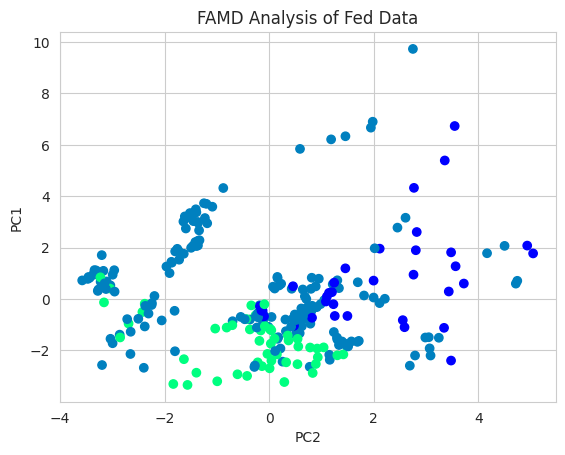

In [93]:
# Visualize the whole dataset in 2D
plt.scatter(X_famd[:][1], X_famd[:][0], c=y.astype(float), cmap='winter')
plt.title('FAMD Analysis of Fed Data')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.show()